In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
#Library used for handling missing data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
#library used for encoding categorical data

from sklearn.model_selection import train_test_split
#used for splitting the data into training and testing set

from sklearn.preprocessing import StandardScaler
#used for feature scaling

from sklearn import metrics


In [3]:
df=pd.read_excel('CollectedData.xlsx')
df.head()

,Name,Qualification,Experience Level,Social Media App,Streaming App,Messaging App,Obsessed
0,Sayam,UnderGraduate,Fresher,Instagram,Youtube,Whatsapp,Yes
1,Asif,UnderGraduate,Intermediate,Facebook,Netflix,Telegram,No
2,Aiyaaz,UnderGraduate,Senior,Snapchat,Prime,Signal,No
3,Aijaz,PostGraduate,Fresher,Instagram,Hotstar,Whatsapp,Yes
4,Armaan,UnderGraduate,Intermediate,Instagram,Youtube,Telegram,Yes


In [4]:
df.columns

Index(['Name', 'Qualification', 'Experience Level', 'Social Media App',
       'Streaming App', 'Messaging App', 'Obsessed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              59 non-null     object
 1   Qualification     59 non-null     object
 2   Experience Level  59 non-null     object
 3   Social Media App  59 non-null     object
 4   Streaming App     59 non-null     object
 5   Messaging App     59 non-null     object
 6   Obsessed          59 non-null     object
dtypes: object(7)
memory usage: 3.4+ KB


In [6]:
print("Distinct values in Qualification feature :",df['Qualification'].unique())
print("Distinct values in Experience Level feature :",df['Experience Level'].unique())
print("Distinct values in Social Media App feature :",df['Social Media App'].unique())
print("Distinct values in Streaming App feature :",df['Streaming App'].unique())
print("Distinct values in Messaging App feature :",df['Messaging App'].unique())
print("Distinct values in Obsessed feature :",df['Obsessed'].unique())

Distinct values in Qualification feature : ['UnderGraduate' 'PostGraduate']
Distinct values in Experience Level feature : ['Fresher' 'Intermediate' 'Senior']
Distinct values in Social Media App feature : ['Instagram' 'Facebook' 'Snapchat']
Distinct values in Streaming App feature : ['Youtube' 'Netflix' 'Prime' 'Hotstar']
Distinct values in Messaging App feature : ['Whatsapp' 'Telegram' 'Signal']
Distinct values in Obsessed feature : ['Yes' 'No']


Encoding the categorical features variables to Numericals

In [7]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()

df['Qualification']=le.fit_transform(df['Qualification'])
df['Experience Level']=le.fit_transform(df['Experience Level'])
df['Social Media App']=le.fit_transform(df['Social Media App'])
df['Streaming App']=le.fit_transform(df['Streaming App'])
df['Messaging App']=le.fit_transform(df['Messaging App'])
df['Obsessed']=le.fit_transform(df['Obsessed'])

In [8]:
df.head()

,Name,Qualification,Experience Level,Social Media App,Streaming App,Messaging App,Obsessed
0,Sayam,1,0,1,3,2,1
1,Asif,1,1,0,1,1,0
2,Aiyaaz,1,2,2,2,0,0
3,Aijaz,0,0,1,0,2,1
4,Armaan,1,1,1,3,1,1


In [9]:
#get the information of the data i.e datatype and count 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              59 non-null     object
 1   Qualification     59 non-null     int32 
 2   Experience Level  59 non-null     int32 
 3   Social Media App  59 non-null     int32 
 4   Streaming App     59 non-null     int32 
 5   Messaging App     59 non-null     int32 
 6   Obsessed          59 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 2.0+ KB


In [10]:
#Get the summary of the data
df.describe()

,Qualification,Experience Level,Social Media App,Streaming App,Messaging App,Obsessed
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.728814,0.847458,1.101695,1.593220,1.067797,0.440678
std,0.448388,0.805446,0.844759,1.146489,0.806534,0.500730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,1.000000,1.500000,2.000000,3.000000,2.000000,1.000000
max,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000


In [11]:
print("Values after encoding Qualification :",df['Qualification'].unique())
print("Values after encoding Experience Level :",df['Experience Level'].unique())
print("Values after encoding Social Media App:",df['Social Media App'].unique())
print("Values after encoding Streaming App :",df['Streaming App'].unique())
print("Values after encoding Messaging App  :",df['Messaging App'].unique())
print("Values after encoding Obsessed App :",df['Obsessed'].unique())

Values after encoding Qualification : [1 0]
Values after encoding Experience Level : [0 1 2]
Values after encoding Social Media App: [1 0 2]
Values after encoding Streaming App : [3 1 2 0]
Values after encoding Messaging App  : [2 1 0]
Values after encoding Obsessed App : [1 0]


In [12]:
#correlation from the data
df.corr()

,Qualification,Experience Level,Social Media App,Streaming App,Messaging App,Obsessed
Qualification,1.000000,0.169922,0.301654,-0.084131,0.004040,-0.149679
Experience Level,0.169922,1.000000,0.124551,0.137026,-0.169591,-0.856441
Social Media App,0.301654,0.124551,1.000000,-0.134571,-0.187433,-0.026252
Streaming App,-0.084131,0.137026,-0.134571,1.000000,-0.249347,-0.102825
Messaging App,0.004040,-0.169591,-0.187433,-0.249347,1.000000,0.095514
Obsessed,-0.149679,-0.856441,-0.026252,-0.102825,0.095514,1.000000


Differentiate the Feature variables into "x" and Target variables into "y"

In [13]:
feature_cols=['Qualification','Experience Level','Social Media App','Streaming App','Messaging App']
x=df[feature_cols]
y=df.Obsessed

In [14]:
x.head()

,Qualification,Experience Level,Social Media App,Streaming App,Messaging App
0,1,0,1,3,2
1,1,1,0,1,1
2,1,2,2,2,0
3,0,0,1,0,2
4,1,1,1,3,1


In [15]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Obsessed, dtype: int32

In [16]:
#split dataset into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
print(x_train.shape)

(41, 5)


In [18]:
print(x_test.shape)

(18, 5)


In [19]:
print(y_train.shape)

(41,)


In [20]:
print(y_test.shape)

(18,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
#Predict 
y_pred=clf.predict(x_test)

In [23]:
#getting the acuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [24]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\asus\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py38haa95532_0         888 KB
    ------------------------------------------------------------
                                           Total:         888 KB

The following packages will be UPDATED:

  conda                               4.12.0-py38haa95532_0 --> 22.9.0-py38haa95532_0




conda-22.9.0         | 888 KB    |            |   0% 
conda-22.9.0         | 888 KB    | #2         |  13% 
conda-22.9.0         | 888 KB    | ###        |  31% 
conda-22.9.0         | 888 KB    | #####2     |  52% 
conda-22.9.0         | 888 KB    | #######    |  70% 
conda-22.9.0         | 888 KB    | #####

In [25]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

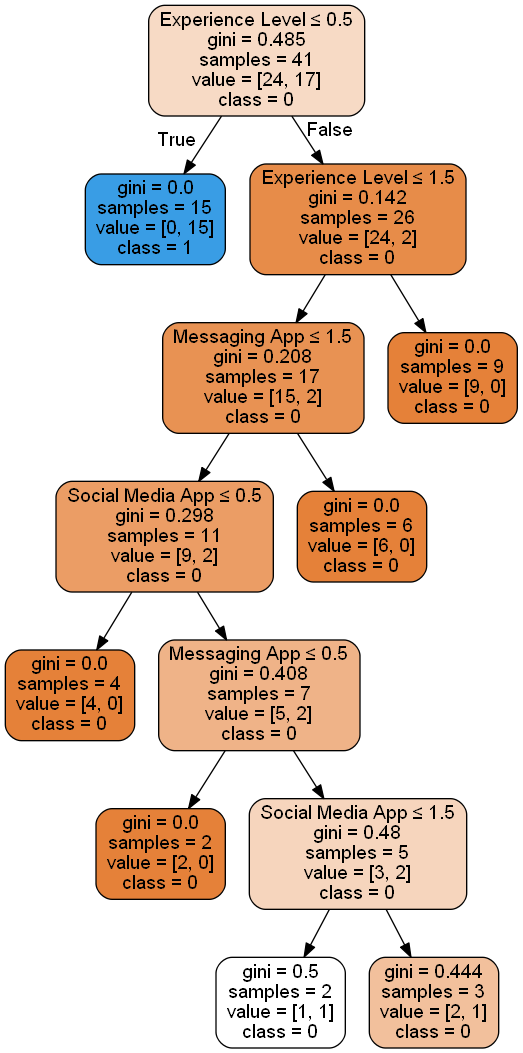

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DataCollected.png')
Image(graph.create_png())

In [29]:
# Create Decision Tree classifer object

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf=clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


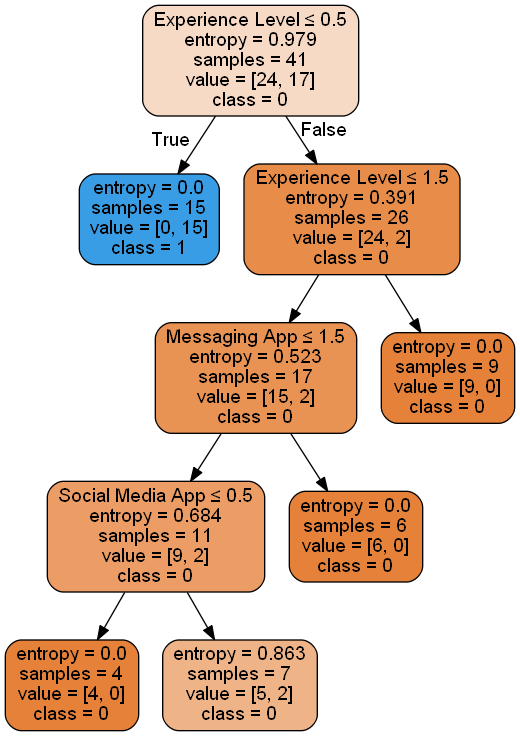

In [30]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('datacollect.png')
Image(graph.create_png())

In [33]:
df.head()

,Name,Qualification,Experience Level,Social Media App,Streaming App,Messaging App,Obsessed
0,Sayam,1,0,1,3,2,1
1,Asif,1,1,0,1,1,0
2,Aiyaaz,1,2,2,2,0,0
3,Aijaz,0,0,1,0,2,1
4,Armaan,1,1,1,3,1,1


In [34]:
df.columns

Index(['Name', 'Qualification', 'Experience Level', 'Social Media App',
       'Streaming App', 'Messaging App', 'Obsessed'],
      dtype='object')

In [35]:
feat=['Qualification', 'Experience Level', 'Social Media App',
       'Streaming App', 'Messaging App']
list(enumerate(feat))

[(0, 'Qualification'),
 (1, 'Experience Level'),
 (2, 'Social Media App'),
 (3, 'Streaming App'),
 (4, 'Messaging App')]

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

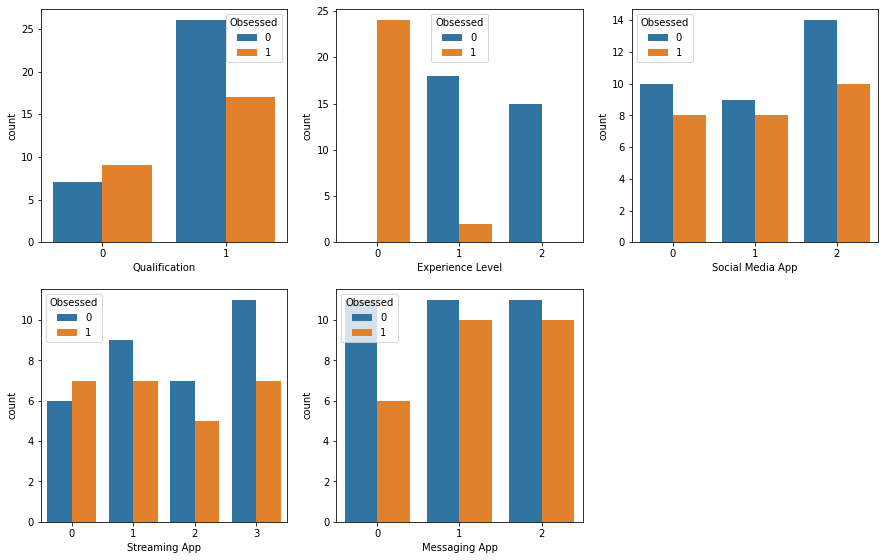

In [36]:
#Plotting categorical data
plt.figure(figsize=(15,30))
for i in enumerate(feat):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='Obsessed',data=df)

In [37]:
sns.heatmap(df2.corr(),annot=True,cmap="YlGnBu")

NameError: name 'df2' is not defined

Using Gaussian Naive Bayes

In [38]:
#Splitting data 
#import tran_test_split function

from sklearn.model_selection import train_test_split

#split dataset into training set and test set
#split dataset into training and testing set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of Y_train:',Y_train.shape)
print('Shape of Y_test:',Y_test.shape)

Shape of X_train: (47, 5)
Shape of X_test: (12, 5)
Shape of Y_train: (47,)
Shape of Y_test: (12,)


In [40]:
# import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

#Create a gaussian classifier
classifier=GaussianNB()

#train the model using the training sets
classifier.fit(X_train,Y_train)

GaussianNB()

In [41]:
#Predict the response for test dataset
Y_pred=classifier.predict(X_test)
print(Y_pred)
print("Score",classifier.score(X_test,Y_test))

[1 0 0 0 1 1 0 0 1 1 0 1]
Score 1.0


In [43]:
#Using Multinomial Naive bayes Model

In [44]:
# import Multinomial naive bayes model

from sklearn.naive_bayes import MultinomialNB

#Create a gaussian classifier
classifier_m=MultinomialNB()

#train the model using the training sets
classifier_m.fit(X_train,Y_train)


MultinomialNB()

In [45]:
#Predict the response for test dataset

Y_pred=classifier_m.predict(X_test)
print(Y_pred)

print("Score",classifier_m.score(X_test,Y_test))

[1 0 0 0 1 1 0 0 1 1 0 1]
Score 1.0


Bernoulli naive bayes model

In [46]:
# import Bernoulli naive bayes model

from sklearn.naive_bayes import BernoulliNB

#Create a gaussian classifier
classifier_b=BernoulliNB()

#train the model using the training sets
classifier_b.fit(X_train,Y_train)


BernoulliNB()

In [47]:
#Predict the response for test dataset

Y_pred=classifier_b.predict(X_test)
print(Y_pred)

print("Score",classifier_b.score(X_test,Y_test))

[1 0 0 0 1 1 0 0 1 1 0 1]
Score 1.0


In [48]:
p=[1,3,1,1,2]
predi=np.array([p])
predi

array([[1, 3, 1, 1, 2]])

here,1 means 'Yes' obsessed and 0 means 'No' not obsessed.

2. remaining

In [50]:
from sklearn import  metrics
confusionmatrix_DT=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix",confusionmatrix_DT)

Confusion Matrix [[9 0]
 [0 9]]


In [51]:
from sklearn import tree
t=tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred=t.predict(x_test)
#score/accuracy
acc_dt=t.score(x_test,y_test)*100
print('Accuracy of the model:',acc_dt)
dt_confusion=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",dt_confusion)

Accuracy of the model: 100.0
Confusion matrix
 [[9 0]
 [0 9]]


In [52]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)
#score/GBccuracy
acc_GB=GB.score(x_test,y_test)*100
print('Accuracy of the model:',acc_GB)
GB_confusion=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix",GB_confusion)

Accuracy of the model: 100.0
Confusion matrix [[9 0]
 [0 9]]


In [53]:
Class_R=metrics.classification_report(y_test,y_pred)
print('\n Classification report :\n',Class_R)


 Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
#score/GBccuracy
acc_knn=knn.score(x_test,y_test)*100
print('Accuracy of the model:',acc_knn)
knn_confusion=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix",knn_confusion)

Accuracy of the model: 66.66666666666666
Confusion matrix [[9 0]
 [6 3]]


In [49]:
pre=classifier.predict(predi)
print("Predict:",pre)

if pre[0] == 0:
    print("No the person isn't obsessed using social media")
else:
    print("Yes the person is obsessed using social media")

Predict: [0]
No the person isn't obsessed using social media
